In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
#IMPORT DATA, REMOVE NON-US STATES AND SET name AS INDEX

In [3]:
Tuition = pd.read_csv('tuition_cost.csv')
Tuition.dropna(subset=['state'], inplace=True)
Tuition.set_index('name', inplace=True)

In [4]:
Tuition

,state,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total
name,,,,,,,,,
Aaniiih Nakoda College,Montana,MT,Public,2 Year,NaN,2380,2380,2380,2380
Abilene Christian University,Texas,TX,Private,4 Year,10350.0,34850,45200,34850,45200
Abraham Baldwin Agricultural College,Georgia,GA,Public,2 Year,8474.0,4128,12602,12550,21024
Academy College,Minnesota,MN,For Profit,2 Year,NaN,17661,17661,17661,17661
Academy of Art University,California,CA,For Profit,4 Year,16648.0,27810,44458,27810,44458
...,...,...,...,...,...,...,...,...,...
York Technical College,South Carolina,SC,Public,2 Year,NaN,5740,5740,12190,12190
Young Harris College,Georgia,GA,Private,4 Year,12372.0,29117,41489,29117,41489
Youngstown State University,Ohio,OH,Public,4 Year,9400.0,8950,18350,14950,24350


In [5]:
#IMPORTING ANOTHER DATA SET TO REMOVE THE ROW WITH "OTHER" UNDER THE VARIABLE "TYPE"

In [6]:
Tuition_2 = pd.read_csv('tuition_cost.csv')
Tuition_2.dropna(subset=['state'], inplace=True)
Tuition_2.set_index('name', inplace=True)

In [7]:
old_word = 'Other'
new_word = 'Public'

# Specify the column where replacement should occur
column_name = 'type'

# Replace the word in the specified column
Tuition_2[column_name] = Tuition_2[column_name].replace(old_word, new_word)


In [8]:
old_word = 'Other'
new_word = '4 Year'

# Specify the column where replacement should occur
column_name = 'degree_length'

# Replace the word in the specified column
Tuition_2[column_name] = Tuition_2[column_name].replace(old_word, new_word)


In [9]:
Tuition_2

,state,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total
name,,,,,,,,,
Aaniiih Nakoda College,Montana,MT,Public,2 Year,NaN,2380,2380,2380,2380
Abilene Christian University,Texas,TX,Private,4 Year,10350.0,34850,45200,34850,45200
Abraham Baldwin Agricultural College,Georgia,GA,Public,2 Year,8474.0,4128,12602,12550,21024
Academy College,Minnesota,MN,For Profit,2 Year,NaN,17661,17661,17661,17661
Academy of Art University,California,CA,For Profit,4 Year,16648.0,27810,44458,27810,44458
...,...,...,...,...,...,...,...,...,...
York Technical College,South Carolina,SC,Public,2 Year,NaN,5740,5740,12190,12190
Young Harris College,Georgia,GA,Private,4 Year,12372.0,29117,41489,29117,41489
Youngstown State University,Ohio,OH,Public,4 Year,9400.0,8950,18350,14950,24350


In [10]:
Tuition_2.groupby(['type'])['degree_length'].value_counts()

type        degree_length
For Profit  2 Year             57
            4 Year             45
Private     4 Year           1181
            2 Year             70
Public      2 Year            985
            4 Year            583
Name: count, dtype: int64

In [11]:
#Comparing Average costs of In-state and Out-state Tuition

In [12]:
Tuition.describe()

,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total
count,1861.000000,2921.000000,2921.000000,2921.000000,2921.000000
mean,10101.845244,16607.326600,23043.319069,20711.517973,27147.510442
std,3266.860254,14780.559032,18933.594208,13195.641363,17637.863251
min,30.000000,480.000000,962.000000,480.000000,1376.000000
25%,7948.000000,4912.000000,5851.000000,9795.000000,11456.000000
50%,10010.000000,10355.000000,17896.000000,17700.000000,23684.000000
75%,12414.000000,27350.000000,36400.000000,29300.000000,39190.000000
max,21300.000000,59985.000000,75003.000000,59985.000000,75003.000000


Text(0.5, 1.0, 'Comparing Average cost of In-state and Out-state Tuition')

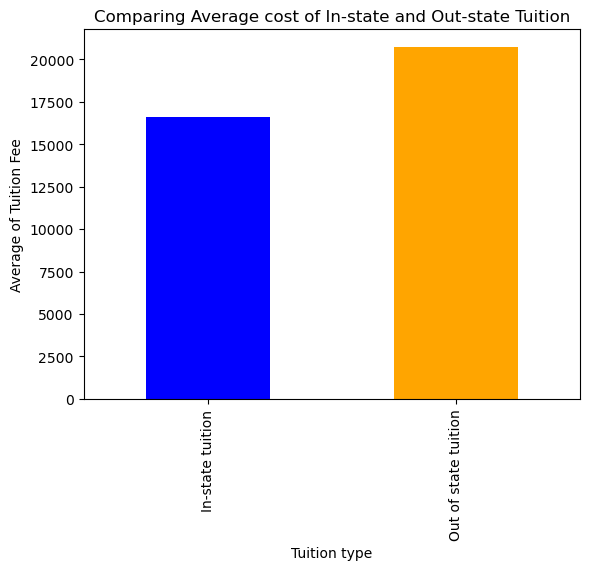

In [13]:
Tuition_plot = {'Type': ['In-state tuition', 'Out of state tuition'],
        'Value': [16607.326600, 20711.517973]}
Tuition_plot = pd.DataFrame(Tuition_plot)

Tuition_plot.plot(kind='bar', x='Type', y='Value', color=['blue', 'orange'], legend=False)

plt.xlabel('Tuition type')
plt.ylabel('Average of Tuition Fee')
plt.title('Comparing Average cost of In-state and Out-state Tuition')

In [14]:
#FIND THE AVERAGE FEE (IN- AND OUT-STATE) OF EACH TYPE OF SCHOOL AND COMPARE IN A CLUSTERED BAR CHART

In [15]:
Tuition_2.groupby(['type'])['in_state_tuition'].mean()


type
For Profit    16865.431373
Private       29797.668265
Public         6066.864796
Name: in_state_tuition, dtype: float64

In [16]:
Tuition_2.groupby(['type'])['out_of_state_tuition'].mean()

type
For Profit    16865.431373
Private       29801.812150
Public        13709.185587
Name: out_of_state_tuition, dtype: float64

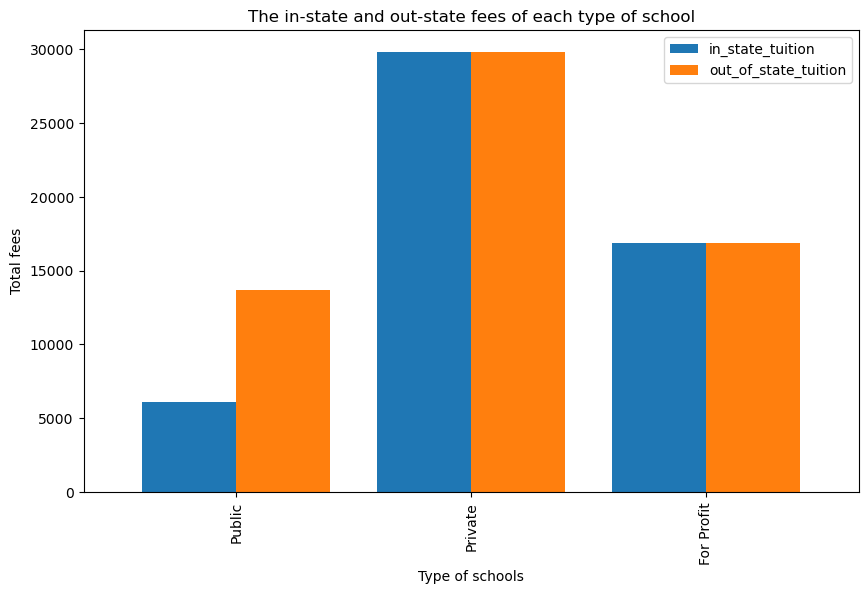

In [17]:
data = {'type': ['Public', 'Private', 'For Profit'],
        'in_state_tuition': [6066.864796, 29797.668265, 16865.431373],
        'out_of_state_tuition': [13709.185587, 29801.812150, 16865.431373]}

Tuition_cost = pd.DataFrame(data)

# Plot clustered bar chart
Tuition_cost.plot(kind='bar', x= 'type', width=0.8, figsize=(10, 6))

plt.title('The in-state and out-state fees of each type of school')
plt.xlabel('Type of schools')
plt.ylabel('Total fees')

plt.show()

In [18]:
Tuition_2["type"].value_counts()

type
Public        1568
Private       1251
For Profit     102
Name: count, dtype: int64

In [19]:
#GROUPING THE TYPE OF SCHOOLS ACCORDING TO THE DEGREE TYPE OFFERED
#FINDING THE NUMBER OF 2-YEAR VS 4-YEAR DEGREES FOR EACH SCHOOL TYPE

In [20]:
Type_degree_length = Tuition_2.groupby(['type'])['degree_length'].value_counts()

In [21]:
Type_degree_length

type        degree_length
For Profit  2 Year             57
            4 Year             45
Private     4 Year           1181
            2 Year             70
Public      2 Year            985
            4 Year            583
Name: count, dtype: int64

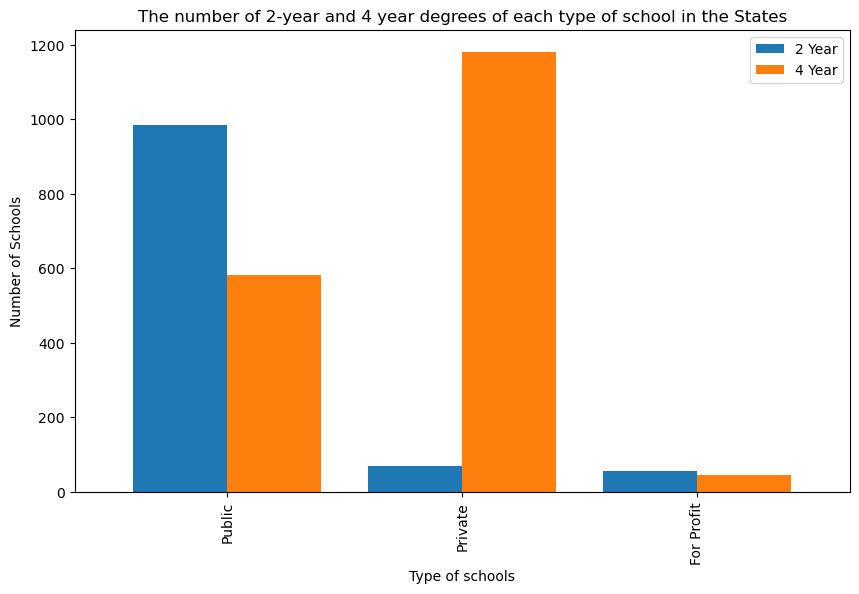

In [22]:
data = {'type': ['Public', 'Private', 'For Profit'],
        '2 Year': [985, 70,  57],
        '4 Year': [583, 1181, 45]}

Tuition_cost = pd.DataFrame(data)

Tuition_cost.plot(kind='bar', x= 'type', width=0.8, figsize=(10, 6))

plt.title('The number of 2-year and 4 year degrees of each type of school in the States')
plt.xlabel('Type of schools')
plt.ylabel('Number of Schools')

plt.show()

In [23]:
#FINDING THE AVERAGE COST SCHOOLS IN EACH STATE CHARGES STUDENTS FOR ROOM AND BOARD 

In [24]:
State_mean_room = Tuition.groupby(['state'])['room_and_board'].mean()

In [25]:
State_mean_room

state
Alabama            7768.000000
Alaska             9388.333333
Arizona            8705.666667
Arkansas           7731.125000
California        12340.454545
Colorado          10544.045455
Connecticut       13764.526316
Delaware          11123.800000
Florida           10300.920000
Georgia            9905.240741
Hawaii            11361.285714
Idaho              7549.800000
Illinois          10622.750000
Indiana           10296.292683
Iowa               8567.875000
Kansas             7475.136364
Kentucky           8688.296296
Louisiana          9274.478261
Maine             10074.916667
Maryland          11680.555556
Massachusetts     14262.972973
Michigan           9243.660000
Minnesota          8256.000000
Mississippi        6275.366667
Missouri           8589.433962
Montana            7662.642857
Nebraska           8124.142857
Nevada             9523.750000
New Hampshire     12473.153846
New Jersey        11985.968750
New Mexico         7319.642857
New York          12148.639053
No

Text(0.5, 1.0, 'Average cost of room and board per each state')

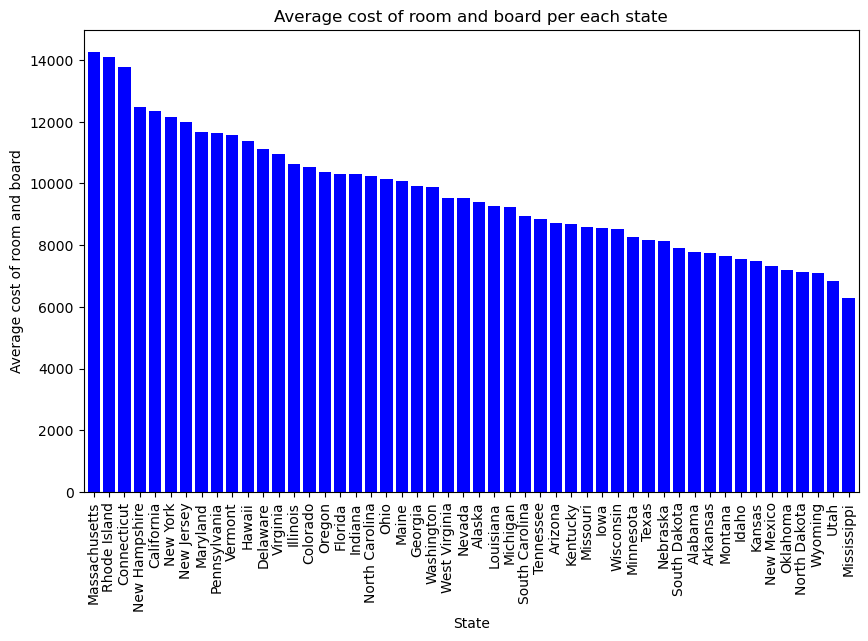

In [26]:

State_mean_room.sort_values( ascending=False, inplace=True)
State_mean_room.plot(kind='bar', color=['blue'],width=0.8, figsize=(10, 6))

plt.xlabel('State')
plt.ylabel('Average cost of room and board')
plt.title('Average cost of room and board per each state')


In [27]:
#FINDING THE AVERAGE COST SCHOOLS IN EACH STATE CHARGES STUDENTS FOR IN STATE TUITION

In [28]:
State_mean_in_tuition = Tuition.groupby(['state'])['in_state_tuition'].mean()

In [29]:
State_mean_in_tuition

state
Alabama           10460.129630
Alaska             9549.500000
Arizona            8226.352941
Arkansas           9454.326087
California        14721.625984
Colorado          13419.368421
Connecticut       22107.055556
Delaware          13713.777778
Florida           14816.886364
Georgia           12806.113924
Hawaii             8934.142857
Idaho             10485.307692
Illinois          18022.944000
Indiana           20187.806452
Iowa              20740.519231
Kansas            12673.903846
Kentucky          15852.454545
Louisiana         12464.882353
Maine             19286.148148
Maryland          18017.622222
Massachusetts     30499.817204
Michigan          15608.064103
Minnesota         16858.605634
Mississippi        7957.812500
Missouri          15750.082192
Montana            8156.000000
Nebraska          15174.151515
Nevada            11723.000000
New Hampshire     21308.142857
New Jersey        17642.518519
New Mexico         6218.416667
New York          22168.199095
No

Text(0.5, 1.0, 'Average cost of in-state tuition per each state')

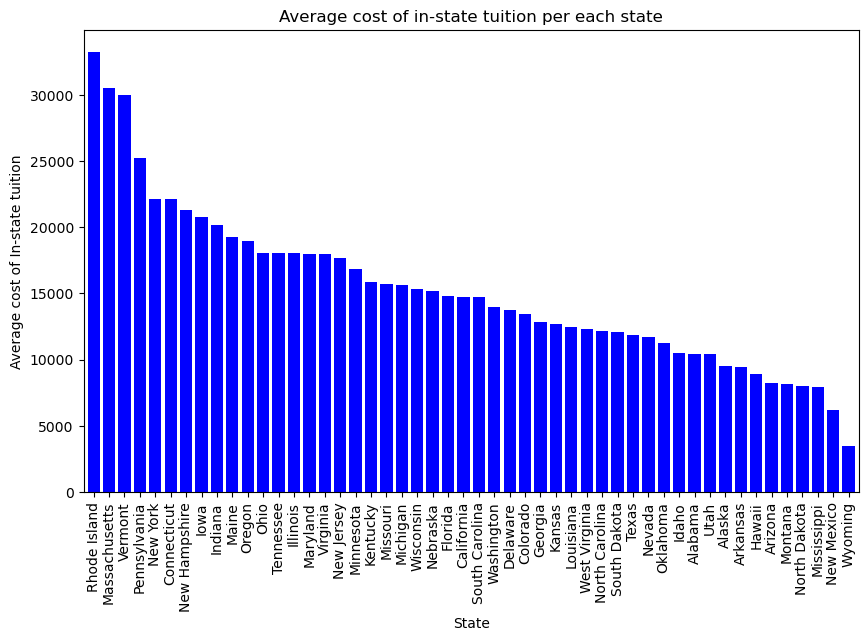

In [30]:
State_mean_in_tuition.sort_values( ascending=False, inplace=True)
State_mean_in_tuition.plot(kind='bar', color=['blue'],width=0.8, figsize=(10, 6))

plt.xlabel('State')
plt.ylabel('Average cost of In-state tuition')
plt.title('Average cost of in-state tuition per each state')


In [31]:
#FINDING THE AVERAGE COST SCHOOLS IN EACH STATE CHARGES STUDENTS FOR OUT OF STATE TUITION

In [32]:
State_mean_out_tuition = Tuition.groupby(['state'])['out_of_state_tuition'].mean()

In [33]:
State_mean_out_tuition

state
Alabama           14848.814815
Alaska            16991.500000
Arizona           13875.647059
Arkansas          12132.260870
California        20166.937008
Colorado          22057.210526
Connecticut       26968.444444
Delaware          19252.666667
Florida           19783.318182
Georgia           17831.924051
Hawaii            15582.142857
Idaho             16707.000000
Illinois          21725.488000
Indiana           24191.677419
Iowa              22034.769231
Kansas            15081.057692
Kentucky          22423.772727
Louisiana         17270.558824
Maine             23068.444444
Maryland          23884.311111
Massachusetts     33231.666667
Michigan          19072.358974
Minnesota         17844.070423
Mississippi       10878.937500
Missouri          18202.041096
Montana           13668.636364
Nebraska          17153.242424
Nevada            18534.400000
New Hampshire     26403.571429
New Jersey        21402.592593
New Mexico        10513.958333
New York          24858.864253
No

Text(0.5, 1.0, 'Average cost of Out-of-state tuition per each state')

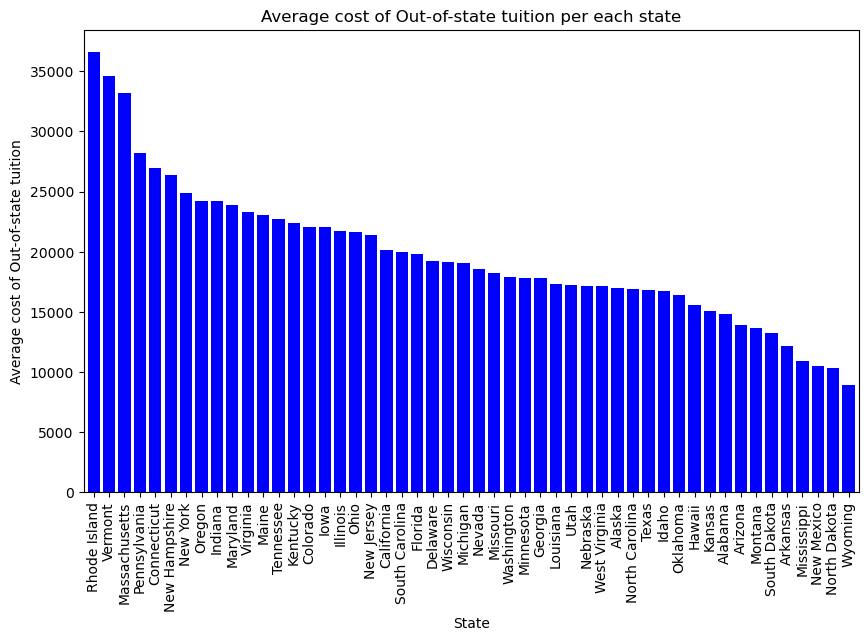

In [34]:
State_mean_out_tuition.sort_values( ascending=False, inplace=True)
State_mean_out_tuition.plot(kind='bar', color=['blue'],width=0.8, figsize=(10, 6))

plt.xlabel('State')
plt.ylabel('Average cost of Out-of-state tuition')
plt.title('Average cost of Out-of-state tuition per each state')
